# How to use metrics on the surface of a sphere (of Earth Radius)
## Load packages

In [1]:
using PyPlot
using DIVAnd

In [2]:
loni,lati = ndgrid(range(0.,stop=360.,length=200),range(-89,stop=89,length=210));

# take out last longitude to not close, that will be done by moddim
#
loni=loni[1:end-1,:]
lati=lati[1:end-1,:]

R=6371.009e3

# Cartesian coordinates for the plotting on a sphere
xi = R*cosd.(loni) .* cosd.(lati);
yi = R*sind.(loni) .* cosd.(lati);
zi =  R*sind.(lati);

mask = trues(size(loni));

## Naive analysis as if coordinates were cartesian

In [3]:
pmc = ones(size(loni)) / (loni[2,1]-loni[1,1]);
pnc = ones(size(lati)) / (lati[1,2]-lati[1,1]);
lon=[2,300,270]
lat=[45,0.0,80]
f=[1.0,-1.0,-1.0]
fi,s = DIVAndrun(mask,(pmc,pnc),(loni,lati),(lon,lat),f,(10.,10.),1.0);

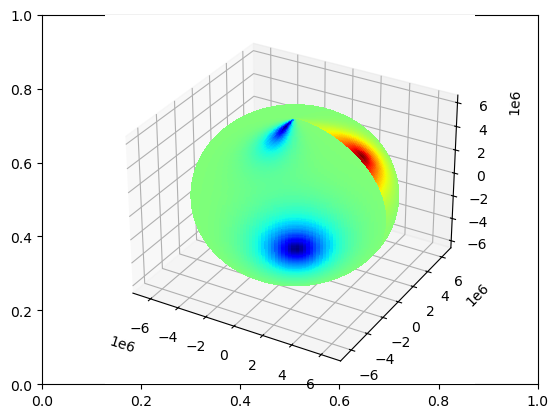

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x7df23158a600>

In [4]:
# The rstride and cstride arguments default to 10
surf(xi,yi,zi, rstride=1, cstride=1,facecolors=plt.get_cmap("jet")((fi.-minimum(fi))/(maximum(fi)-minimum(fi))), 
linewidth=0, antialiased=false, shade=false)

## With correct metrics and correlation length in the same metric (meters)

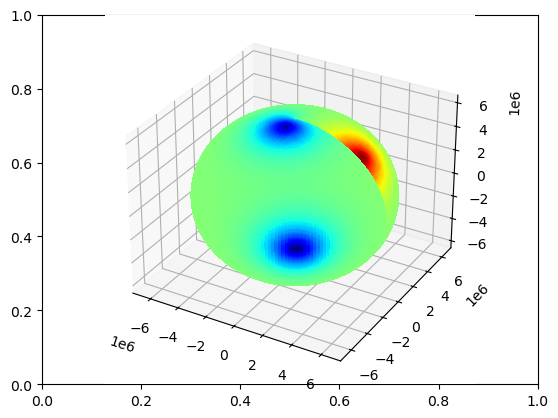

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x7df229406750>

In [5]:
# note that the metric function works with Earth Radius. If you have a sphere of a different radius, just scale the pm accordingly (pm are inverse of length)
pm,pn=DIVAnd_metric(loni,lati)
lon=[2,300,270]
lat=[45,0.0,80]
f=[1.0,-1.0,-1.0]
fi,s = DIVAndrun(mask,(pm,pn),(loni,lati),(lon,lat),f,(1000000.,1000000.),1.0);

# The rstride and cstride arguments default to 10
surf(xi,yi,zi, rstride=1, cstride=1,facecolors=plt.get_cmap("jet")((fi.-minimum(fi))/(maximum(fi)-minimum(fi))),
linewidth=0, antialiased=false, shade=false)

## Adding periodicity in the analysis (not the plotting mesh)

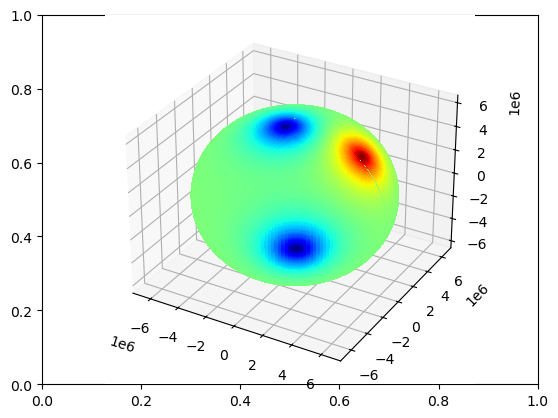

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x7df226b9b680>

In [6]:
pm,pn=DIVAnd_metric(loni,lati)
lon=[2,300,270]
lat=[45,0.0,80]
f=[1.0,-1.0,-1.0]
fi,s = DIVAndrun(mask,(pm,pn),(loni,lati),(lon,lat),f,(1000000.,1000000.),1.0,moddim=[1,0]);

# The rstride and cstride arguments default to 10
surf(xi,yi,zi, rstride=1, cstride=1,facecolors=plt.get_cmap("jet")((fi.-minimum(fi))/(maximum(fi)-minimum(fi))), 
linewidth=0, antialiased=false, shade=false)